In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/aadil/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## The train and test data are imported. The training dataset consists of 10,06,803 records. The testing data consists 51,221 records.

In [492]:
import random as rd
trainfile = "FinalDataSet_final_1_2.csv"
n = sum(1 for line in open(trainfile)) - 1
s = 100000
skip1 = sorted(rd.sample(range(1,n+1),n-s))


In [493]:

train_data = pd.read_csv(trainfile,encoding = 'utf-8',skiprows = skip1)
test_data = pd.read_csv("testing_dataset.csv",encoding = 'utf-8')

In [494]:
train_data

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal,Group
0,01/01/2010,Bajra,Local,Average,KALABURAGI,1135,Quintal�,1315,1608,1485,Cereals
1,01/01/2010,Jowar,Jowar ( White),Average,VIJAYAPURA,6,Quintal�,1900,2200,2100,Cereals
2,01/01/2010,Maize,Hybrid/Local,Average,BANGARPET,460,Quintal�,1480,1570,1510,Cereals
3,01/01/2010,Maize,Local,Medium,RANIBENNUR,1177,Quintal�,1300,1410,1395,Cereals
4,01/01/2010,Maize,Local,Average,GADAG,107,Quintal�,1002,1396,1367,Cereals
5,01/01/2010,Paddy,Jaya,Average,CHANNAGIRI,350,Quintal�,1400,1400,1400,Cereals
6,01/01/2010,Paddy,Paddy Jyoti,Average,NANJANGUD,1440,Quintal�,1410,1510,1450,Cereals
7,01/01/2010,Paddy,Paddy Fine Variety,Average,DAVANAGERE,2100,Quintal�,1700,2300,2000,Cereals
8,01/01/2010,Rice,Coarse,Average,SHIVAMOGGA,20,Quintal�,1900,2400,2150,Cereals
9,01/01/2010,Rice,Fine,Average,MYSURU,2914,Quintal�,3500,4500,4000,Cereals


## Usman

#### The number of records and number of attributes in the training data is determined

In [495]:
train_data.shape

(100000, 11)

#### The number of records and number of attributes in the testing data is determined

In [496]:
test_data.shape

(51221, 10)

In [497]:
test_data.head()

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal
0,01/01/2017,Bajra,Hybrid,Average,KUSTAGI,150,Quintal�,1510,1510,1510
1,01/01/2017,Jowar,Jowar ( White),Average,BELAGAVI,10,Quintal�,2800,3400,3200
2,01/01/2017,Jowar,Jowar ( White),Medium,HAGARI BOMMANA HALLI,25,Quintal�,1630,1630,1630
3,01/01/2017,Jowar,Jowar Hybrid,Average,HUMNABAD,29,Quintal�,1000,1100,1050
4,01/01/2017,Maize,Local,Average,SHIGGAON,2913,Quintal�,1300,1400,1362


#### The above result shows that there are impure values in the 'Unit' and 'Commodity'. The below step is to determine the impure records in 'Unit' column.

In [498]:
pd.unique(test_data['Unit'].values.ravel())

array(['Quintal�', 'Numbers�', 'Thousands', 'Quintal', 'Numbers'], dtype=object)

#### It was found that the 'Unit' column contained "Quintal�" and "Numbers�" as the impure records

#### The below step is to determine the impure records in 'Commodity' column.

In [499]:
pd.unique(test_data['Commodity'].values.ravel())

array(['Bajra', 'Jowar', 'Maize', 'Navane', 'Paddy', 'Ragi', 'Rice',
       'Blackgram', 'Cowpea', 'Greengram', 'Horse Gram', 'Tur', 'Copra',
       'Groundnut', 'Groundnut Seed', 'Soyabeen', 'Sunflower', 'Cotton',
       'Jute', 'Beans', 'Beetroot', 'Bitter Gourd', 'Bottle Gourd',
       'Brinjal', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower',
       'Chilly Capsicum', 'Cucumbar', 'Green Chilly', 'Green Ginger',
       'Knool Khol', 'Onion', 'Potato', 'Raddish', 'Ridgeguard',
       'Seemebadanekai', 'Snakeguard', 'Sweet Potato', 'Sweet Pumpkin',
       'Tomato', 'Coriander Seed', 'Coconut (Per 1000)', 'Jaggery',
       'Tender Coconut', 'Arecanut', 'Cow (For Each)', 'Goat (For Each)',
       'Ox (For Each)', 'She Baffalo (For Each)', 'She Goat (For Each)',
       'Sheep (For Each)', 'Same/Savi', 'Wheat', 'Alasande Gram', 'Arhar',
       'Avare', 'Avaredal', 'Bengal Gramdal', 'Bengalgram',
       'Black Gramdal', 'Chennangidal', 'Green Gramdal', 'Tur Dal',
       'Castor Seed', 'Gin

#### Here we find that "Lint�" and "Sona Masuri Old�" are the impure values in the 'Commodity' column

# Our training data and testing data have certain unclean values in some of the columns
# So we need to clean the values in those columns

In [500]:
print("Cleaning training data...")
train_data = train_data.replace({'Quintal�':'Quintal'}, regex = True)
train_data = train_data.replace({'Quintal ':'Quintal'}, regex = True)
train_data = train_data.replace({'Numbers�':'Numbers'}, regex = True)
train_data = train_data.replace({'Numbers ':'Numbers'}, regex = True)
train_data = train_data.replace({'Lint�':'Lint'}, regex = True)
train_data = train_data.replace({'Lint ':'Lint'}, regex = True)
train_data = train_data.replace({'Sona Masuri Old�':'Sona Masuri Old'}, regex = True)
print("Cleaning training data...completed")
print("Cleaning testing data...")
test_data = test_data.replace({'Quintal�':'Quintal'}, regex = True)
test_data = test_data.replace({'Quintal ':'Quintal'}, regex = True)
test_data = test_data.replace({'Numbers�':'Numbers'}, regex = True)
test_data = test_data.replace({'Numbers ':'Numbers'}, regex = True)
test_data = test_data.replace({'Lint�':'Lint'}, regex = True)
test_data = test_data.replace({'Lint ':'Lint'}, regex = True)
test_data = test_data.replace({'Sona Masuri Old�':'Sona Masuri Old'}, regex = True)
print("Cleaning testing data...completed")

Cleaning training data...
Cleaning training data...completed
Cleaning testing data...
Cleaning testing data...completed


#### After cleaning, we check again for impure values and find that impure values have been replaced by correct values

In [501]:
pd.unique(test_data['Unit'].values.ravel())

array(['Quintal', 'Numbers', 'Thousands'], dtype=object)

## Akshay

#### Let's check the amount of null values present in the training data

In [502]:
train_data.isnull().sum()

Date           0
Commodity      0
Variety        0
Grade          0
Market         0
Arrival        0
Unit           0
Min            0
Max            0
Modal          0
Group        931
dtype: int64

#### We can easily infer that only the group column has null values. This may be due to erroneous entries in the dataset. We need to fix it. This can be done by assigning to the null values, its preceding value 


In [503]:
train_data.fillna(method='ffill',inplace = True)
train_data.isnull().sum()

Date         0
Commodity    0
Variety      0
Grade        0
Market       0
Arrival      0
Unit         0
Min          0
Max          0
Modal        0
Group        0
dtype: int64

### The null values have been replaced

## Importing test dataset

In [504]:
test_data.head()

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal
0,01/01/2017,Bajra,Hybrid,Average,KUSTAGI,150,Quintal,1510,1510,1510
1,01/01/2017,Jowar,Jowar ( White),Average,BELAGAVI,10,Quintal,2800,3400,3200
2,01/01/2017,Jowar,Jowar ( White),Medium,HAGARI BOMMANA HALLI,25,Quintal,1630,1630,1630
3,01/01/2017,Jowar,Jowar Hybrid,Average,HUMNABAD,29,Quintal,1000,1100,1050
4,01/01/2017,Maize,Local,Average,SHIGGAON,2913,Quintal,1300,1400,1362


## Aadil

## In the test dataset, the Group column is empty
## We need to fill it with appropriate values
### This can be achieved by creating a dictionary with each key from test data corresponding to a value from training data

In [505]:
dictionary = dict(zip(train_data.Commodity, train_data.Group))
dictionary

{'Alasande Gram': 'Pulses',
 'Alasandikai': 'Vegetables',
 'All Flowers': 'Live Stock/Poultry',
 'Antawala': 'Forest Products',
 'Apple': 'Fruits',
 'Arecanut': 'Drugs & Narcotics',
 'Arhar': 'Pulses',
 'Ash Gourd': 'Vegetables',
 'Avare': 'Pulses',
 'Avaredal': 'Pulses',
 'Bajra': 'Cereals',
 'Banana': 'Fruits',
 'Banana Green': 'Vegetables',
 'Beans': 'Vegetables',
 'Beetroot': 'Vegetables',
 'Bengal Gramdal': 'Pulses',
 'Bengalgram': 'Pulses',
 'Betal Leaves': 'Drugs & Narcotics',
 'Bitter Gourd': 'Vegetables',
 'Black Gramdal': 'Pulses',
 'Blackgram': 'Pulses',
 'Borehannu': 'Fruits',
 'Bottle Gourd': 'Vegetables',
 'Brinjal': 'Vegetables',
 'Bull (For Each)': 'Live Stock/Poultry',
 'Bullar': 'Pulses',
 'Bunch Beans': 'Vegetables',
 'Cabbage': 'Vegetables',
 'Calf (For Each)': 'Live Stock/Poultry',
 'Capsicum': 'Vegetables',
 'Carrot': 'Vegetables',
 'Cashewnut': 'Dry Fruits',
 'Castor Seed': 'Oil Seeds',
 'Cauliflower': 'Vegetables',
 'Chapparada Avare': 'Vegetables',
 'Chennangid

### The dictionary is then mapped to the test data and the proper values are filled in the Group column.

In [506]:
test_data['Group'] = test_data['Commodity'].map(dictionary)
test_data.head()

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal,Group
0,01/01/2017,Bajra,Hybrid,Average,KUSTAGI,150,Quintal,1510,1510,1510,Cereals
1,01/01/2017,Jowar,Jowar ( White),Average,BELAGAVI,10,Quintal,2800,3400,3200,Cereals
2,01/01/2017,Jowar,Jowar ( White),Medium,HAGARI BOMMANA HALLI,25,Quintal,1630,1630,1630,Cereals
3,01/01/2017,Jowar,Jowar Hybrid,Average,HUMNABAD,29,Quintal,1000,1100,1050,Cereals
4,01/01/2017,Maize,Local,Average,SHIGGAON,2913,Quintal,1300,1400,1362,Cereals


## Aravind

### Now we concatenate the training and testing data

In [507]:
data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
data.shape

(151221, 11)

In [508]:
data

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal,Group
0,01/01/2010,Bajra,Local,Average,KALABURAGI,1135,Quintal,1315,1608,1485,Cereals
1,01/01/2010,Jowar,Jowar ( White),Average,VIJAYAPURA,6,Quintal,1900,2200,2100,Cereals
2,01/01/2010,Maize,Hybrid/Local,Average,BANGARPET,460,Quintal,1480,1570,1510,Cereals
3,01/01/2010,Maize,Local,Medium,RANIBENNUR,1177,Quintal,1300,1410,1395,Cereals
4,01/01/2010,Maize,Local,Average,GADAG,107,Quintal,1002,1396,1367,Cereals
5,01/01/2010,Paddy,Jaya,Average,CHANNAGIRI,350,Quintal,1400,1400,1400,Cereals
6,01/01/2010,Paddy,Paddy Jyoti,Average,NANJANGUD,1440,Quintal,1410,1510,1450,Cereals
7,01/01/2010,Paddy,Paddy Fine Variety,Average,DAVANAGERE,2100,Quintal,1700,2300,2000,Cereals
8,01/01/2010,Rice,Coarse,Average,SHIVAMOGGA,20,Quintal,1900,2400,2150,Cereals
9,01/01/2010,Rice,Fine,Average,MYSURU,2914,Quintal,3500,4500,4000,Cereals


### In the Units column of data, there are three distinct values: 

In [509]:
pd.unique(data['Unit'].values.ravel())

array(['Quintal', 'Numbers', 'Thousands'], dtype=object)

### We can reduce it to 2 by converting Thosands into Numbers. This will facilitate in easier analysis

In [510]:
data['Arrival'] = np.where(data['Unit']=='Thousands',data['Arrival'],data['Arrival'])
data = data.replace({'Thousands':'Numbers'}, regex = True)

In [511]:
pd.unique(data['Unit'].values.ravel())

array(['Quintal', 'Numbers'], dtype=object)

### Let us check if the data still has null values

In [512]:
data.isnull().sum()

Date          0
Commodity     0
Variety       0
Grade         0
Market        0
Arrival       0
Unit          0
Min           0
Max           0
Modal         0
Group        64
dtype: int64

### We can follow the same procedure as above to replace the null values

In [513]:
data.fillna(method='ffill',inplace = True)
data.isnull().sum()

Date         0
Commodity    0
Variety      0
Grade        0
Market       0
Arrival      0
Unit         0
Min          0
Max          0
Modal        0
Group        0
dtype: int64

### We are adding one more column 'Avg' which holds the average of Min and Max column values

In [514]:
data['Avg'] = (data['Min']+data['Max'])/2.0
data

,Date,Commodity,Variety,Grade,Market,Arrival,Unit,Min,Max,Modal,Group,Avg
0,01/01/2010,Bajra,Local,Average,KALABURAGI,1135,Quintal,1315,1608,1485,Cereals,1461.5
1,01/01/2010,Jowar,Jowar ( White),Average,VIJAYAPURA,6,Quintal,1900,2200,2100,Cereals,2050.0
2,01/01/2010,Maize,Hybrid/Local,Average,BANGARPET,460,Quintal,1480,1570,1510,Cereals,1525.0
3,01/01/2010,Maize,Local,Medium,RANIBENNUR,1177,Quintal,1300,1410,1395,Cereals,1355.0
4,01/01/2010,Maize,Local,Average,GADAG,107,Quintal,1002,1396,1367,Cereals,1199.0
5,01/01/2010,Paddy,Jaya,Average,CHANNAGIRI,350,Quintal,1400,1400,1400,Cereals,1400.0
6,01/01/2010,Paddy,Paddy Jyoti,Average,NANJANGUD,1440,Quintal,1410,1510,1450,Cereals,1460.0
7,01/01/2010,Paddy,Paddy Fine Variety,Average,DAVANAGERE,2100,Quintal,1700,2300,2000,Cereals,2000.0
8,01/01/2010,Rice,Coarse,Average,SHIVAMOGGA,20,Quintal,1900,2400,2150,Cereals,2150.0
9,01/01/2010,Rice,Fine,Average,MYSURU,2914,Quintal,3500,4500,4000,Cereals,4000.0


## Usman

### We now plot a graph to find the commodity which is being sold the most

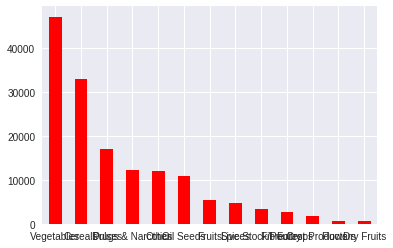

In [515]:
data.Group.value_counts(dropna=True).plot(kind="bar",color="red",rot=0)

### We find that Vegetables are being sold the most

In [516]:
veg=data.loc[data['Group']=='Vegetables','Commodity']

In [517]:
##Erroneus try

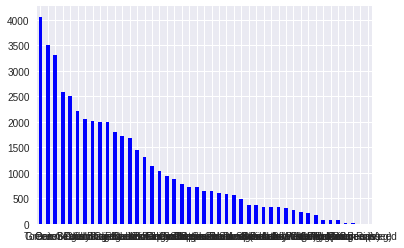

In [518]:
veg.value_counts(dropna=True).plot(kind="bar",color="blue",rot=0)

## Aadil

#### In vegetables, we find plot a graph to find the vegetable which will be sold the most

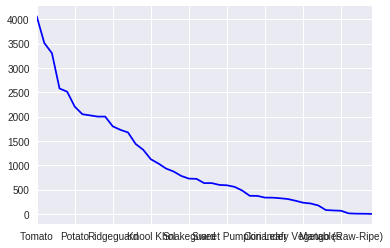

In [519]:
veg.value_counts(dropna=True).plot(kind="line",color="blue",rot=0)

#### Here we find that the vegetable is being sold the most

In [520]:

#data.Modal.value_counts(dropna=True).plot(kind="bar",color="Blue",position=0,label = "Modal",rot=0)
#data.Avg.value_counts(dropna=True).plot(kind="bar",color="Green",position =1,label = "Average",rot=0)


#plt.legend()
#plt.xlabel('Prices')
#plt.ylabel('Count')

#sns.despine()
#plt.show()

#### Now we plot a graph to compare the average and modal prices for the Group Vegetables

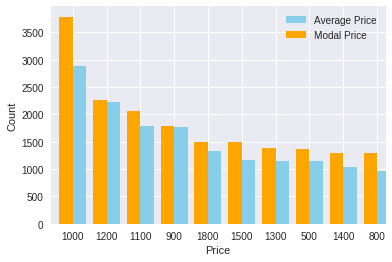

In [521]:
veg_avg = data.loc[data['Group'] == 'Vegetables', 'Avg'].value_counts()
veg_modal = data.loc[data['Group'] == 'Vegetables', 'Modal'].value_counts()


# Bar width
width = 0.4

veg_avg.iloc[0:10].plot(kind='bar', width=width, color='skyblue', position=0, label='Average Price', rot=0)
veg_modal.iloc[0:10].plot(kind='bar', width=width, color='orange', position=1, label='Modal Price', rot=0)

plt.legend()
plt.xlabel('Price')
plt.ylabel('Count')

sns.despine()
plt.show()

#### We find that except for the extremes, the average and the modal price are almost the same. This implies that most of the farmers sell their crop at a price which is the average of the minimum and maximum price of that crop

# Model Building

### The algorithms available for classification are:
   #### 1. C4.5
   #### 2. k-nearest neighbour classifier
   #### 3. Naive Bayes
   #### 4. Support Vector Machine (SVM)
   #### 5. Apriori
   #### 6. AdaBoost
   #### 7. Random Forest
   #### 8. Decision tree

### The algorithms available for regression are:
#### 1. Decision tree
#### 2. Random Forest
#### 3. Time-series
#### 4. Linear regression
#### 5. Generalised Linear Model

### We have studied Decision tree and Random forest because our predictions involve both classification and regression. These two algorithms handle both classification and regression problems.

In [522]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size = 0.2)
X_train = train.drop("Arrival",axis = 1,inplace = False)
X_train = X_train.drop("Group",axis = 1,inplace = False)
Y_train = train["Arrival"]
X_test = test.drop("Arrival",axis =1,inplace = False)
X_test = X_test.drop("Group",axis =1,inplace = False)
Y_test = test["Arrival"]
len(X_train)

120976

#### Arrival attribute is to be predicted, so it is removed from training and testing data and put into X variable
#### Hence arrival attribute is to be put into Y variable

In [523]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
       # Encoding only categorical variables
       if X_test[col].dtypes=='object':
               data=X_train[col].append(X_test[col])
               le.fit(data.values)
               X_train[col]=le.transform(X_train[col])
               X_test[col]=le.transform(X_test[col])

### Encoding methods available: 
#### Ordinal
#### One-Hot
#### Label
#### Helmert Contrast
#### Sum Contrast
#### Polynomial Contrast
#### Backward Difference Contrast
#### Simple Hashing

### We have used one-hot encoding and label encoding because one hot encoding yields faster algorithms and label encoding helps in running linear regression faster

#### Label encoding is done so that the regression methods accept categorical data
#### For example, our data has Commodity attribute which has values like Wheat, Jowar, Maize, Paddy etc.
#### What label encoding does is it assigns to each record in an attribute, an integer number like Wheat=0, Jowar=1, Maize=2, Paddy=3 etc.

In [490]:
X_train = X_train[:10000]
X_test = X_test[:10000]
Y_train = Y_train[:10000]
Y_test = Y_test[:10000]
len(X_train)
len(X_test)

10000

#### We have considered the first 10000 records of the data because the first 10000 records consist of all the data needed for preprocessing

In [526]:
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train_scale,Y_train)
predictions = lm.predict(X_test)
# Checking the models accuracy
lm.score(X_test,Y_test)


-396065.78163098817

### One hot encoding is done so that all the categorical variables are converted into a suitable format for use in the models

In [532]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Commodity']
for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)

#### One hot encoding is better that Label encoding because it assigns onlt 2 unique values 0,1 to the data. This helps in analyzing the data quickly.
#### Label encoding was used for linear regression earlier because one hot encoding creates extra attributes which will slow down the performance of linear regression
#### However, algorithm like Random forest performs faster with one hot encoded data 
#### The attributes 'Commodity', 'Variety', 'Grade', 'Unit' are categorical. Hence these must be one hot encoded

### Random forest

In [533]:

attri = ['Date','Variety','Grade','Market','Min','Max']
for attr in attri:
    X_train = X_train.drop(attr,axis = 1,inplace = False)
    X_test = X_test.drop(attr,axis = 1,inplace = False)

In [43]:
from sklearn.metrics import explained_variance_score
r2_score(Y_test, prediction1)

0.89466091297383554

In [750]:
arr = []

In [751]:
for i in range(20,31):
    arr.append(i)

In [752]:
dep = []

In [753]:
dep = [80]

In [754]:
feat = ['auto']

In [755]:
samplesplit = []

In [758]:
samplesplit = [50,60]

In [759]:
logic = [True]

#### The loop iterates for Random forest with the values assigned to the parameters

In [796]:
from sklearn.model_selection import train_test_split
#Import Library
predarr = []
scores = []
model = []
prediction2 = 0
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
# Create Random Forest object
for estimator in arr:
    for d in dep:
        for f in feat:
            for split in samplesplit:
                for b in logic:
                    model= RandomForestRegressor(n_estimators=estimator,max_features = 'auto')
# Train the model using the training sets and check score
                    model = model.fit(X_train, Y_train)
#Predict Output
                    prediction2= model.predict(X_test)
                    predarr.append(prediction2)
                    r2 = r2_score(Y_test, prediction2)
                    scores.append(r2)

#### The predictions are then appended into an array so that they can be used for later for error determination

In [797]:
fin = np.array([1,2,3,4,5,6])
len(predarr)
arr = []##The models are described by the numbers
for i in range(1,len(predarr)+1):
    arr.append(i)

#### The training error for the predictions is calculated

In [934]:
mse_train = []
from sklearn.metrics import median_absolute_error
for prediction in predarr:
    err = np.sqrt(mean_absolute_error(Y_train[:30245],prediction))/155
    mse_train.append(err)

#### The testing error for the predictions is calculated

In [920]:
mse_test = []
from sklearn.metrics import mean_absolute_error
for prediction in predarr:
    err = np.sqrt(mean_absolute_error(Y_test[:30245],prediction))/100
    mse_test.append(err)
from numpy import median
med = median(mse_test)

In [914]:
mse_test

[0.51798576855349798,
 0.52486194175607503,
 0.51549594272795995,
 0.51595206625819068,
 0.51009906205977795,
 0.51368946655784586,
 0.51091812484450339,
 0.51017184889435174,
 0.51069421711760499,
 0.51152676193881708,
 0.51136689206047803,
 0.51161629568962252,
 0.50771547717565357,
 0.50751505523884644,
 0.50935547304005535,
 0.51002680613744433,
 0.50977275447987047,
 0.50949730192789711,
 0.50893479356804827,
 0.50887963216967369,
 0.50706578306316441,
 0.50903720649216755,
 0.50817348850965449,
 0.50661884888616759,
 0.50837312950250446,
 0.5125071083913022,
 0.50826616726456098,
 0.5077475324106584,
 0.50828752308593561,
 0.50823538566938364,
 0.51141764156042213,
 0.50874223197967472,
 0.50705065049092846,
 0.50924138069493619,
 0.50759601860576109,
 0.50781717437468421,
 0.51013704410844429,
 0.50810108316409619,
 0.50837525480372947,
 0.51026821606709294,
 0.50852460943425903,
 0.50724420775020862,
 0.50751903844387447,
 0.50968146203496678,
 0.5080993745297574,
 0.5076267833

In [986]:
len(mse_train)
arr = np.asarray(arr)

176

#### We then plot the training error for the predictions which we have obtained

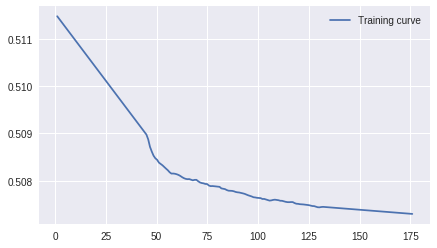

In [928]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx = np.linspace(arr.min(),arr.max(), 200)
# interpolate + smooth
itp = interp1d(arr,mse_test, kind='linear')
window_size, poly_order = 101, 1
yy_sg = savgol_filter(itp(xx), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, arr, mse_test)
yy_fit = func(xx, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot1 = plt.plot(xx, yy_sg, label= "Training curve")

plt.legend(loc='best')

In [ ]:
####

/home/aadil/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


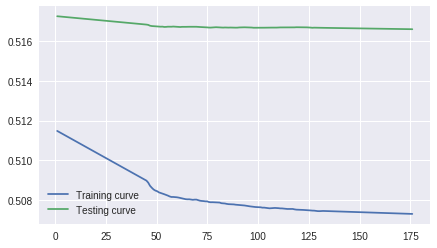

In [935]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx1 = []
yy_sg1 = []
fit = []
yy_fit = []
xx1 = np.linspace(arr.min(),arr.max(), 200)

# interpolate + smooth
itp = interp1d(arr,mse_train, kind='linear')
window_size, poly_order = 101, 1
yy_sg1 = savgol_filter(itp(xx1), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, arr, mse_train)
yy_fit = func(xx, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot1 = plt.plot(xx, yy_sg, label= "Training curve")

plot2 = plt.plot(xx1, yy_sg1, label= "Testing curve")
plt.legend(loc='best')

In [851]:
plt.show(plot1)

In [58]:
scores.sort(reverse = True)

In [319]:
print(scores)

[0.31859086228722699, 0.34788639604071525, 0.35387385742582955, 0.37957712424083923, 0.41772248927845623, 0.33691584779529726, 0.37753430287002154, 0.38459741537537562, 0.37894493203312563, 0.39073622339120551, 0.36909960325723878, 0.34809865463283185, 0.38159607072498414, 0.36895806805957831, 0.3686519885483901, 0.36643923104691467, 0.36856149361915858, 0.3825616986423499]


ValueError: x and y must have same first dimension, but have shapes (3,) and (162,)

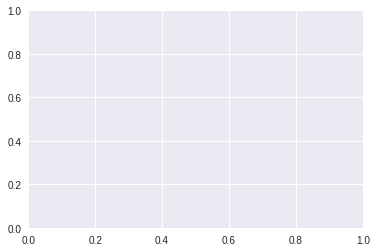

In [48]:
plt.plot(arr,scores)
plt.xlabel("Estimators")
plt.ylabel("Scores")
plt.show()

In [48]:
preds[2]= r2_score(Y_test, prediction2)

In [49]:
X_train_1 = X_train[:10000]
X_test_1 = X_test[:10000]
Y_train_1 = Y_train[:10000]
Y_test_1 = Y_test[:10000]
#Import Library
from sklearn.ensemble import RandomForestRegressor 
# Create Random Forest object
model= RandomForestRegressor(n_estimators=10)
# Train the model using the training sets and check score
model.fit(X_train_1, Y_train_1)
#Predict Output
prediction3= model.predict(X_test_1)

#### The r2 score for Random forest with 100 estimators was found to be 0.8947

#### With no. of estimators = 10

In [50]:
prediction3

array([ 150. ,   10. ,   25. , ...,  318.2,  289.9,  143. ])

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction3)

0.88883936669687569

In [52]:
preds[3]= r2_score(Y_test, prediction3)

#### The r2 score for Random forest with 100 estimators was found to be 0.8961

In [53]:
preds

[0.89577482849764012,
 0.89466091297383554,
 0.89515107000578409,
 0.88883936669687569]

In [54]:
max(preds)

0.89577482849764012

#### We see that the Random Forest with estimators=10 has the highest r^2 value

#### We got a variance score of 0.8954

#### The variance score is calculated because the more the variance score, the more variant is our data.
#### More variant data means that the algorithms have more diverse attributes and hence yield better performance.

#### Random forest is used because it overcomes the problem of overfitting
#### Random Forest does not depend on whether the problem is of classififcation or of regression

In [392]:
(mse_train)

[0.56192597497890229,
 0.56239047624132621,
 0.55950413871634974,
 0.56007779810196434,
 0.56025525939130272,
 0.56010614912652013,
 0.55911112808638486,
 0.56044362183530527,
 0.55960424133705444,
 0.56009490272635853]

In [69]:
a = []
a[:] = [(1 - x)/10 for x in mse_train]


In [70]:
a

[0.08208029969251035,
 0.081886865631303526,
 0.081968260636934548,
 0.081938383084683292,
 0.081953887829739752,
 0.081933127649466003,
 0.081940368157843876,
 0.08194763362711692,
 0.08196138171694109,
 0.081934787123942393,
 0.081950118215458528,
 0.0819563048376616,
 0.08197092628307083,
 0.081943570090400125,
 0.081954477967417977]

In [403]:
len(mse_train)

10

In [404]:
min(mse_test)

0.11298266870638281

In [957]:
min(mse_train)

0.51550025264838395

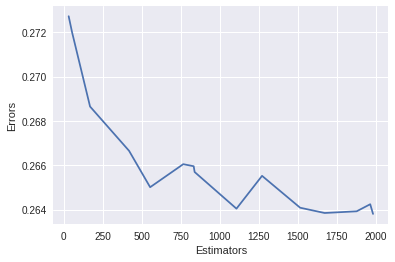

In [46]:

plt.plot(arr,mse_test)
plt.xlabel("Estimators")
plt.ylabel("Errors")
plt.show()

In [56]:
from scipy import interpolate
f = interpolate.interp1d(arr, mse_test, kind="linear")
x_int = np.linspace(arr[0],arr[-1], 20)
y_int = f(x_int)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_int, y_int, color="blue", label= "Interpolated curve")
plt.plot(arr,mse_train)
plt.xlabel("Estimators")
plt.ylabel("Errors")
plt.show()

ValueError: x and y arrays must be equal in length along interpolation axis.

### Gradient Boosting Model(GBM)

#### With learning rate = 1.0, estimators = 100, max_depth = 1

In [1089]:
string = []
rate1 = []
rate1 = np.random.uniform(low = 0.1, high = 1.8,size = (5,))
est1 = []
est1 = np.random.randint(low = 10,high = 1000,size = (5,))
depth1 = [1,2]
for e in est1:
    for r in rate1:
        for d in depth1:
            string.append(str(e)+":"+str(r)+":"+str(d))

In [1090]:
len(string)

50

In [1091]:
rate = [1,0.8,0.6,0.4,0.2]
rate.sort()
est = [50,40,30,20,10]
depth = [5,6]
predgb = []
gbmscore = []
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 
#use GBM function
string = []
for estimator in est:
    for lrate in rate:
        for dep in depth:
            string.append(str(estimator)+":"+str(lrate)+":"+str(dep))
            clf = GradientBoostingRegressor(n_estimators=estimator, learning_rate=lrate, max_depth=dep)
            pred1 =clf.fit(X_train, Y_train)
            pred1 = clf.predict(X_test)
            predgb.append(pred1)
            scr = r2_score(Y_test,pred1)
            gbmscore.append(scr)

In [1101]:
train_err = []
test_err = []
prr = predgb[0]
for predi in predgb:
        trainerr = np.sqrt(mean_absolute_error(Y_train[:30245],predi))/160
        train_err.append(trainerr)
        testerr = np.sqrt(mean_absolute_error(Y_test[:30245],predi))/100
        test_err.append(testerr)

In [1102]:
len(train_err)

50

/home/aadil/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


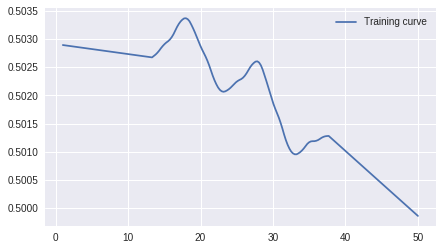

In [1103]:
x = []
for i in range(0,len(train_err)):
    x.append(i+1)
x= np.asarray(x)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx2 = []
yy_sg2 = []
fit = []
yy_fit = []
xx2 = np.linspace(1,x.max(), 200)

# interpolate + smooth
itp = interp1d(x,train_err, kind='linear')
window_size, poly_order = 101, 1
yy_sg2 = savgol_filter(itp(xx2), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, train_err)
yy_fit = func(xx2, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot2 = plt.plot(xx2, yy_sg2, label= "Training curve")
plt.legend(loc='best')

/home/aadil/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


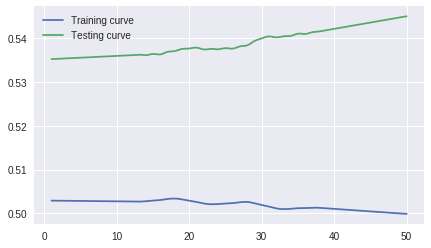

In [1104]:
x = []
for i in range(0,len(train_err)):
    x.append(i+1)
x= np.asarray(x)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx3 = []
yy_sg3 = []
fit = []
yy_fit = []
xx3 = np.linspace(1,x.max(), 200)

# interpolate + smooth
itp = interp1d(x,test_err, kind='linear')
window_size, poly_order = 101, 1
yy_sg3 = savgol_filter(itp(xx3), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, test_err)
yy_fit = func(xx3, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot2 = plt.plot(xx2, yy_sg2, label= "Training curve")
plot3 = plt.plot(xx3, yy_sg3, label= "Testing curve")
plt.legend(loc='best')

#### With learning rate = 1.0, estimators = 1000, max_depth = 1

In [46]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.0, max_depth=1)
pred2 =clf.fit(X_train_1, Y_train_1)
pred2 = clf.predict(X_test_1)
pred2

array([ 201.63535287,   10.58065659,   10.58065659, ...,  336.1376963 ,
        286.30509995,  201.63535287])

#### With learning rate = 1.0, estimators = 10000, max_depth = 1

In [47]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=10000, learning_rate=1.0, max_depth=1)
pred3 =clf.fit(X_train_1, Y_train_1)
pred3= clf.predict(X_test_1)
pred3

array([ 149.83026975,   12.96101393,   19.90685323, ...,  338.73454111,
        284.63640742,  146.14039882])

#### With learning rate = 1.5, estimators = 100, max_depth = 1

In [48]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.5, max_depth=1)
pred4 =clf.fit(X_train_1, Y_train_1)
pred4 = clf.predict(X_test_1)
pred4

array([ 352.64148635,   30.70431869,   30.70431869, ...,  352.64148635,
        352.64148635,   30.70431869])

#### With learning rate = 1.5, estimators = 1000, max_depth = 1

In [49]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.5, max_depth=1)
pred5 =clf.fit(X_train_1, Y_train_1)
pred5 = clf.predict(X_test_1)
pred5

array([ 182.59470456,    9.05948296,   30.74601844, ...,  377.65605123,
        248.25213671,  110.12266156])

#### With learning rate = 1.5, estimators = 10000, max_depth = 1

In [50]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=10000, learning_rate=1.5, max_depth=1)
pred6 =clf.fit(X_train_1, Y_train_1)
pred6 = clf.predict(X_test_1)
pred6

array([ 153.83531294,   11.69131048,   24.08635729, ...,  329.20858507,
        289.9350711 ,  139.45617238])

#### With learning rate = 1.0, estimators = 100, max_depth = 2

In [51]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=2)
pred7 =clf.fit(X_train_1, Y_train_1)
pred7 = clf.predict(X_test_1)
pred7

array([ 132.48776583,    6.8278829 ,   34.60663121, ...,  302.01799246,
        302.01799246,  132.48776583])

#### With learning rate = 1.0, estimators = 1000, max_depth = 2

In [52]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.0, max_depth=2)
pred8 =clf.fit(X_train_1, Y_train_1)
pred8 = clf.predict(X_test_1)
pred8

array([ 146.51310814,   10.21086944,   22.97334542, ...,  321.01378464,
        290.29167589,  144.45515249])

#### With learning rate = 1.0, estimators = 10000, max_depth = 2

In [53]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=10000, learning_rate=1.0, max_depth=2)
pred9 =clf.fit(X_train_1, Y_train_1)
pred9 = clf.predict(X_test_1)
pred9

array([ 149.01956557,    9.9003554 ,   19.39433194, ...,  318.02103123,
        289.19835286,  143.29753797])

#### With learning rate = 1.5, estimators = 100, max_depth = 2

In [54]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.5, max_depth=2)
pred10 =clf.fit(X_train_1, Y_train_1)
pred10= clf.predict(X_test_1)
pred10

array([ 152.68451417,    3.19799836,   43.16056807, ...,  316.69989937,
        316.69989937,  152.68451417])

#### With learning rate = 1.5, estimators = 1000, max_depth = 2

In [55]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.5, max_depth=2)
pred11 =clf.fit(X_train_1, Y_train_1)
pred11= clf.predict(X_test_1)
pred11

array([ 153.58478329,   12.24034642,   28.25838286, ...,  310.4265927 ,
        286.92894012,  140.1657445 ])

#### With learning rate = 1.5, estimators = 10000, max_depth = 2

In [56]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor 

#use GBM function

clf = GradientBoostingRegressor(n_estimators=10000, learning_rate=1.5, max_depth=2)
pred12 =clf.fit(X_train_1, Y_train_1)
pred12= clf.predict(X_test_1)
pred12

array([ 146.27007891,    9.47775122,   26.00436781, ...,  315.37632202,
        291.06164892,  141.77040186])

In [57]:
pred = [0,0,0,0,0,0,0,0,0,0,0,0]

In [58]:
pred[0] = r2_score(Y_test_1, pred1)

In [59]:
pred[1]=r2_score(Y_test_1, pred2)

In [60]:
pred[2]=r2_score(Y_test_1, pred3)

In [61]:
pred[3]=r2_score(Y_test_1, pred4)

In [62]:
pred[4]=r2_score(Y_test_1, pred5)

In [63]:
pred[5]=r2_score(Y_test_1, pred6)

In [64]:
pred[6]=r2_score(Y_test_1, pred7)

In [65]:
pred[7]=r2_score(Y_test_1, pred8)

In [66]:
pred[8]=r2_score(Y_test_1, pred9)

In [67]:
pred[9]=r2_score(Y_test_1, pred10)

In [68]:
pred[10]=r2_score(Y_test_1, pred11)

In [69]:
pred[11]=r2_score(Y_test_1, pred12)

In [70]:
pred

[0.9067600630939201,
 0.91194066166321808,
 0.91208986588748331,
 0.91126347144691389,
 0.91199782796232065,
 0.91209624138390744,
 0.91149338342224784,
 0.90344304176383894,
 0.90339529756885495,
 0.90681406429981348,
 0.90640089578853988,
 0.91781237560487283]

In [109]:
max(pred)

0.91781237560487283

#### We find that the maximum r^2 score for the GBM is when learning rate is 1.5, estimators are 10,000 and maximum depth is 2

### When we did not use GBM, we got a variance score of 0.8926. This showed that the predictive performance of the model was low. When GBM was used, the score increased to 0.9178. This shows that our data was overfitted

### We have used Gradient boosting because we want to avoid over fitting in our data. GBM algorithm reduces overfitting and hence it is been used.

#### Gradient boosting has been used to boost the performance of the algorithm
#### Gradient boosting helps in overcoming overfitting by reducing it

In [80]:
from sklearn.metrics import median_absolute_error
model_mse = median_absolute_error(Y_test,pred1)
print(model_mse)

96.9881429157


### Decision tree

In [1229]:
import timeit
start_time = timeit.default_timer()
preddt = []
dtscore = []
dttrainerr = []
dttesterr = []
from sklearn import tree
# Create tree object 
criteria = ['mse','friedman_mse']
split = ['best','random']
stringdt = []
dept = [80,70,60,50,40,30,20,10,None]
for c in criteria:
    for s in split:
        for d in dept:
            stringdt.append(str(c)+":"+str(s)+":"+str(d))
            model = tree.DecisionTreeRegressor(criterion = c,splitter = s,max_depth = d)  
            # Train the model using the training sets and check score
            model.fit(X_train, Y_train)
            model.score(X_train, Y_train)
            #Predict Output
            predicted= model.predict(X_test)
            errdt = np.sqrt(np.mean(np.abs((Y_test[:30245]-predicted)/Y_test[:30245])))/100
            dttesterr.append(errdt)
            errdt = np.sqrt(np.mean(np.abs((Y_train[:30245]-predicted)/Y_train[:30245])))/400
            dttrainerr.append(errdt)
elapsed = timeit.default_timer()-start_time
print(elapsed)

8.565835693996632


In [1232]:
len(dttrainerr)

36

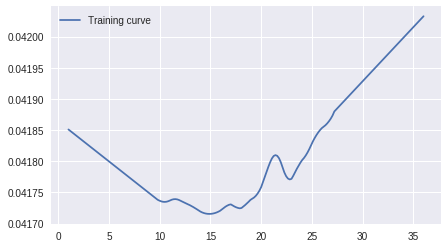

In [1230]:
x = []
for i in range(0,len(dttrainerr)):
    x.append(i+1)
x= np.asarray(x)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx4 = []
yy_sg4 = []
fit = []
yy_fit = []
xx4 = np.linspace(1,x.max(), 200)

# interpolate + smooth
itp = interp1d(x,dttrainerr, kind='linear')
window_size, poly_order = 101, 1
yy_sg4 = savgol_filter(itp(xx4), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, dttrainerr)
yy_fit = func(xx4, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot4 = plt.plot(xx4, yy_sg4, label= "Training curve")
plt.legend(loc='best')

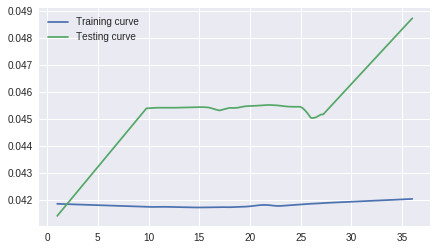

In [1231]:
x = []
for i in range(0,len(dttesterr)):
    x.append(i+1)
x= np.asarray(x)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np
xx5 = []
yy_sg5 = []
fit = []
yy_fit = []
xx5 = np.linspace(1,x.max(), 200)

# interpolate + smooth
itp = interp1d(x,dttesterr, kind='linear')
window_size, poly_order = 101, 1
yy_sg5 = savgol_filter(itp(xx5), window_size, poly_order)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, dttesterr)
yy_fit = func(xx5, *fit)

fig, ax = plt.subplots(figsize=(7, 4))
plot4 = plt.plot(xx4, yy_sg4, label= "Training curve")

plot5 = plt.plot(xx5, yy_sg5, label= "Testing curve")
plt.legend(loc='best')

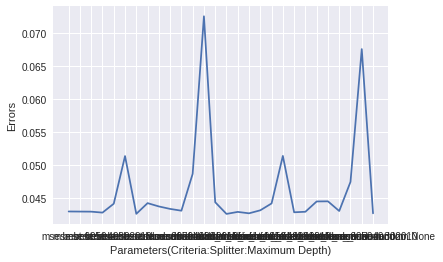

In [1199]:
xarr = []
for i in range(0,len(stringdt)):
    xarr.append(i)
plt.xticks(xarr,stringdt)
plt.plot(xarr,dttesterr)
plt.xlabel("Parameters(Criteria:Splitter:Maximum Depth)")
plt.ylabel("Errors")
plt.show()    


In [87]:
predicted

array([ 150.,   10.,   25., ...,  318.,  290.,  143.])

In [91]:
r2_score(predicted, Y_test)

0.86951492193195179

#### Decision trees are independent of the type of problem i.e., classification or regression
#### Here, data type is not a constraint
#### As our data involves both clasification and regression methods, decision tree is considered

In [90]:
from sklearn.metrics import median_absolute_error
model_mse = median_absolute_error(Y_test,predicted)
print(model_mse)

0.0


#### We have chosen Random forest over decision tree because decision tree builds only a single tree, whereas random forest builds many trees and chooses the best tree among them
#### This ensures better results
#### Also, as our data has both classification (predicting variety that is most popular in an area) and regression (predicting the commodity with highest arrival quantity at a market) problems, Random forest can be used efficiently for both the purposes

In [375]:
lst = []
fin = []
for i in range(1,11):
    lst.append(i)
fin = np.array(lst)

In [376]:
len(mse_train)

10

In [327]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import numpy as np

xx1 = np.linspace(arr.min(),arr.max(), 210)

# interpolate + smooth
itp1 = interp1d(arr,mse_train, kind='linear')
window_size1, poly_order1 = 101, 1
yy_sg1 = savgol_filter(itp(xx1), window_size1, poly_order1)
# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit1, _ = curve_fit(func, arr, mse_train)
yy_fit1 = func(xx1, *fit1)

fig1, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(xx1, yy_sg1, 'k', label= "Training curve")
plt.legend(loc='best')

AttributeError: 'list' object has no attribute 'min'

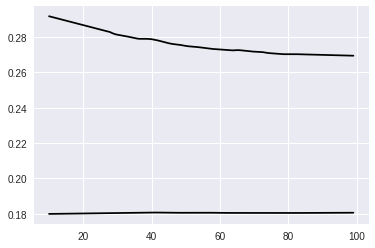

In [197]:
plt.plot(xx, yy_sg, 'k', label= "Testing curve")
plt.plot(xx1, yy_sg1, 'k', label= "Testing curve")